In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
# Import reviews.csv
yelp_review = pd.read_csv("https://usc-bootcamp-yelpreview-text-analysis.s3.us-east-2.amazonaws.com/reviews.csv")

In [3]:
# Print the dataframe
yelp_review.rating.unique()

array(['5 star rating', '1 star rating', '3 star rating', '4 star rating',
       '2 star rating'], dtype=object)

In [4]:
# Convert
yelp_review['ratings'] = yelp_review['rating'].map(lambda x:int(x[0]))

In [5]:
yelp_review

,reviews,rating,review_count,ratings
0,Panda Express was on point tonight! I ordered ...,5 star rating,62,5
1,The dude and I came to this Panda Express arou...,5 star rating,62,5
2,"I ordered 5 total plates , fried rice , chow m...",1 star rating,62,1
3,I always order Panda Express from here and the...,3 star rating,62,3
4,"I've never had a bad experience here, I don't ...",4 star rating,62,4
...,...,...,...,...
19516,Food Was Alright... Upset They Dont Have Chang...,1 star rating,42,1
19517,I just had a party for 30 people and I was so ...,5 star rating,42,5
19518,These people said they were open at midnight a...,1 star rating,42,1
19519,"Its PandEx! Chow Mien, Kung Pau and Orange Chi...",4 star rating,42,4


In [6]:
# Create a length column that counts the number of words in reviews
yelp_review['length']=yelp_review['reviews'].apply(len)
yelp_review.head()

,reviews,rating,review_count,ratings,length
0,Panda Express was on point tonight! I ordered ...,5 star rating,62,5,334
1,The dude and I came to this Panda Express arou...,5 star rating,62,5,770
2,"I ordered 5 total plates , fried rice , chow m...",1 star rating,62,1,154
3,I always order Panda Express from here and the...,3 star rating,62,3,634
4,"I've never had a bad experience here, I don't ...",4 star rating,62,4,644


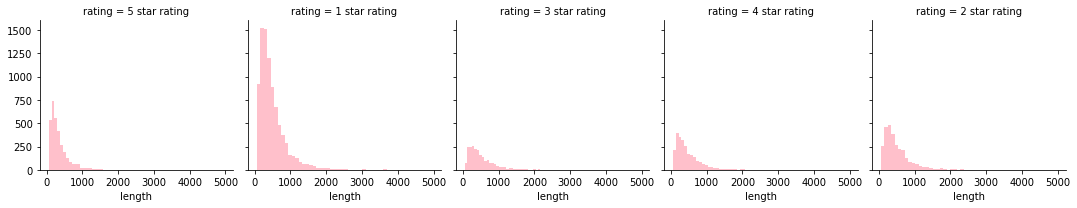

In [7]:
# Compare text length to rating
graph = sns.FacetGrid(data=yelp_review,col='rating')
graph.map(plt.hist,'length',bins=50,color='pink')

In [8]:
# Getting the mean values of the length and review_counts columns with respect to the rating on the review 
stval = yelp_review.groupby('ratings').mean()
stval

,review_count,length
ratings,,
1,50.522265,494.403060
2,46.674467,510.150891
3,43.686364,513.384091
4,43.091278,471.680325
5,43.096136,349.540958


In [9]:
# Finding the correlation between the review_counts and length columns 
yelp_review.corr()

,review_count,ratings,length
review_count,1.000000,-0.090365,0.05871
ratings,-0.090365,1.000000,-0.10885
length,0.058710,-0.108850,1.00000


In [10]:
# Categorize ratings in to "1", "2", "3"
yelp_review['status']=yelp_review['ratings'].map(lambda x:1 if x<3 else (2 if x<4 else 3))

In [11]:
yelp_review

,reviews,rating,review_count,ratings,length,status
0,Panda Express was on point tonight! I ordered ...,5 star rating,62,5,334,3
1,The dude and I came to this Panda Express arou...,5 star rating,62,5,770,3
2,"I ordered 5 total plates , fried rice , chow m...",1 star rating,62,1,154,1
3,I always order Panda Express from here and the...,3 star rating,62,3,634,2
4,"I've never had a bad experience here, I don't ...",4 star rating,62,4,644,3
...,...,...,...,...,...,...
19516,Food Was Alright... Upset They Dont Have Chang...,1 star rating,42,1,233,1
19517,I just had a party for 30 people and I was so ...,5 star rating,42,5,316,3
19518,These people said they were open at midnight a...,1 star rating,42,1,152,1
19519,"Its PandEx! Chow Mien, Kung Pau and Orange Chi...",4 star rating,42,4,200,3


In [12]:
# Seperate the dataset into X and Y for prediction
x = yelp_review['reviews']
y = yelp_review['status']
print(x.head())
print(y.head())

0    Panda Express was on point tonight! I ordered ...
1    The dude and I came to this Panda Express arou...
2    I ordered 5 total plates , fried rice , chow m...
3    I always order Panda Express from here and the...
4    I've never had a bad experience here, I don't ...
Name: reviews, dtype: object
0    3
1    3
2    1
3    2
4    3
Name: status, dtype: int64


In [13]:
# Clearning the reviews, remove stopwords and punctuation 
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [14]:
# Converting the words into a vector
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names()[1000])
print(vocab.get_feature_names()[2000])

37673
Panda Express was on point tonight! I ordered through the mobile app and picked up order at pick up time and it was ready on time.  I double checked if my order was correct and it was. They gave us extra utensils and sauce.  The food was hot and fresh.  Superb customer service as well!  The best experience I've had at Panda Express!
  (0, 4888)	2
  (0, 6398)	1
  (0, 8574)	2
  (0, 10552)	1
  (0, 12936)	1
  (0, 13975)	1
  (0, 15354)	1
  (0, 16645)	1
  (0, 17107)	1
  (0, 18336)	1
  (0, 19510)	1
  (0, 19628)	1
  (0, 20343)	1
  (0, 20734)	1
  (0, 21075)	1
  (0, 22621)	1
  (0, 25970)	1
  (0, 27366)	2
  (0, 27402)	1
  (0, 28329)	1
  (0, 28330)	1
  (0, 28684)	1
  (0, 29727)	1
  (0, 31182)	1
  (0, 31665)	1
  (0, 34863)	2
  (0, 35128)	1
  (0, 36109)	1
  (0, 36171)	1
  (0, 36910)	1
Getting the words back:
390
AIR


In [15]:
x = vocab.transform(x)
# Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
# Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# Density of the matrix
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (19521, 37673)
Non-Zero occurences:  765802
Density of the matrix =  0.10413200467279797


In [16]:
# Splitting the dataset into training set and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[2186   63  128]
 [ 158   48  198]
 [ 148   25  951]]
Score: 81.56
Classification Report:               precision    recall  f1-score   support

           1       0.88      0.92      0.90      2377
           2       0.35      0.12      0.18       404
           3       0.74      0.85      0.79      1124

    accuracy                           0.82      3905
   macro avg       0.66      0.63      0.62      3905
weighted avg       0.78      0.82      0.79      3905



In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[2305    1   71]
 [ 235    1  168]
 [ 280    0  844]]
Score: 80.67
Classification Report:               precision    recall  f1-score   support

           1       0.82      0.97      0.89      2377
           2       0.50      0.00      0.00       404
           3       0.78      0.75      0.76      1124

    accuracy                           0.81      3905
   macro avg       0.70      0.57      0.55      3905
weighted avg       0.77      0.81      0.76      3905



In [19]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[1971  148  258]
 [ 183   57  164]
 [ 255   99  770]]
Score: 71.65
Classification Report:               precision    recall  f1-score   support

           1       0.82      0.83      0.82      2377
           2       0.19      0.14      0.16       404
           3       0.65      0.69      0.66      1124

    accuracy                           0.72      3905
   macro avg       0.55      0.55      0.55      3905
weighted avg       0.70      0.72      0.71      3905



In [20]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[2292   11   74]
 [ 221   23  160]
 [ 224    8  892]]
Score: 82.13
Classification Report:               precision    recall  f1-score   support

           1       0.84      0.96      0.90      2377
           2       0.55      0.06      0.10       404
           3       0.79      0.79      0.79      1124

    accuracy                           0.82      3905
   macro avg       0.73      0.60      0.60      3905
weighted avg       0.79      0.82      0.78      3905



In [21]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
"""# parameter evaluation
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[2247   23  107]
 [ 196   38  170]
 [ 268   32  824]]
Score: 79.62
Classification Report:               precision    recall  f1-score   support

           1       0.83      0.95      0.88      2377
           2       0.41      0.09      0.15       404
           3       0.75      0.73      0.74      1124

    accuracy                           0.80      3905
   macro avg       0.66      0.59      0.59      3905
weighted avg       0.76      0.80      0.77      3905



In [22]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[1658   29  690]
 [ 126   11  267]
 [ 157   11  956]]
Score:  67.22
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.70      0.77      2377
           2       0.22      0.03      0.05       404
           3       0.50      0.85      0.63      1124

    accuracy                           0.67      3905
   macro avg       0.52      0.53      0.48      3905
weighted avg       0.69      0.67      0.65      3905



In [23]:
# XGBoost Classifier
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for XGBoost Classifier:
[[2250   32   95]
 [ 176   59  169]
 [ 186   46  892]]
Score:  81.97
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.95      0.90      2377
           2       0.43      0.15      0.22       404
           3       0.77      0.79      0.78      1124

    accuracy                           0.82      3905
   macro avg       0.69      0.63      0.63      3905
weighted avg       0.79      0.82      0.80      3905



In [24]:
# Multilayer perceptron classifier 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[2154  117  106]
 [ 153  111  140]
 [ 106  105  913]]
Score: 81.38
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.91      0.90      2377
           2       0.33      0.27      0.30       404
           3       0.79      0.81      0.80      1124

    accuracy                           0.81      3905
   macro avg       0.67      0.66      0.67      3905
weighted avg       0.80      0.81      0.81      3905



In [25]:
# Positive review
pr = yelp_review['reviews'][0]
print(pr)
print("Actual Rating: ",yelp_review['rating'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
xgb.predict(pr_t)[0]

Panda Express was on point tonight! I ordered through the mobile app and picked up order at pick up time and it was ready on time.  I double checked if my order was correct and it was. They gave us extra utensils and sauce.  The food was hot and fresh.  Superb customer service as well!  The best experience I've had at Panda Express!
Actual Rating:  5 star rating
Predicted Rating:


3

In [26]:
# Average review
ar = yelp_review['reviews'][21]
print(ar)
print("Actual Rating: ",yelp_review['rating'][21])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
xgb.predict(ar_t)[0]

I was denied food before time of close. and before when i called on the phone to place an order to pickup was rudely told to "come get it yourself." Can't believe a company hires people like this. I hope justice is served and that b***h that answered the phone is FIRED!
Actual Rating:  1 star rating
Predicted Rating:


1

In [27]:
# Negative review
nr = yelp_review['reviews'][2]
print(nr)
print("Actual Rating: ",yelp_review['rating'][2])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
xgb.predict(nr_t)[0]

I ordered 5 total plates , fried rice , chow main, double orange chicken. Came hone and where is the fried rice? Check your order before you leave # upset
Actual Rating:  1 star rating
Predicted Rating:


1

In [28]:
count = yelp_review['rating'].value_counts()
print(count)

1 star rating    8758
5 star rating    3235
2 star rating    2863
4 star rating    2465
3 star rating    2200
Name: rating, dtype: int64


In [39]:
classifier_name = ["Multinomial Naive Bayes", "Random Forest Classifier", "Decision Tree", "Support Vector Machines", "Gradient Boosting Classifier", "K Neighbors Classifier", "XGBoost Classifier", "Multilayer Perceptron Classifier"]
score_number = [accuracy_score(y_test,predmnb)*100, accuracy_score(y_test,predrmfr)*100, accuracy_score(y_test,preddt)*100, accuracy_score(y_test,predsvm)*100, accuracy_score(y_test,predgbi)*100, accuracy_score(y_test,predknn)*100, accuracy_score(y_test,predxgb)*100, accuracy_score(y_test,predmlp)*100]
classifier_name

['Multinomial Naive Bayes',
 'Random Forest Classifier',
 'Decision Tree',
 'Support Vector Machines',
 'Gradient Boosting Classifier',
 'K Neighbors Classifier',
 'XGBoost Classifier',
 'Multilayer Perceptron Classifier']

In [40]:
final_df = pd.DataFrame({'Classifier':classifier_name, 'Score': score_number})
final_df

,Classifier,Score
0,Multinomial Naive Bayes,81.562100
1,Random Forest Classifier,80.665813
2,Decision Tree,71.651729
3,Support Vector Machines,82.125480
4,Gradient Boosting Classifier,79.615877
5,K Neighbors Classifier,67.221511
6,XGBoost Classifier,81.971831
7,Multilayer Perceptron Classifier,81.382843
